# Versuch 2
## Festkörperkette
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen?

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren von <code>scipy.constants</code>. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! Sinnvoll wären z. B. die universelle Gaskonstante $R$ und die Faradaykonstante $F$ .

Es ist sinnvoll, bereits jetzt etwaige Konstanten zu definieren, oder Werte für den studentschen $t$-Faktor einzutragen. Achtet wenn notwendig auf die Einheiten!

In [2]:
from Hilfsdateien.importe_Konstanten import *

### Erster Auswertungsschritt


Zu Beginn wollen wir die Gibbs-Energie aus der gemessenen elektromotorischen Kraft bestimmen. Hierzu sollten zunächst unsere Daten aus einer Datei eingelesen und an eine Variable übergeben werden. Welchen Befehl könnt ihr hierfür nutzen?

In [3]:
dateiname = 'data_v2.dat'
messwerte = np.genfromtxt(dateiname,usecols=(0,1),skip_header=1,dtype='float')
T = messwerte[:,0] #Celsius
T += 273.15 #K
delta_T = 5.0e-2 #K
emk = messwerte[:,1] #V
delta_emk = 5.0e-4 #V

Als nächstes sollte nun die Gibbs-Energie aus der elektromotorischen Kraft bestimmt werden. Wie lautet die Formel hierzu? Diese könnt ihr nun mittels <code>sympy</code> implementieren. SymPy ermöglicht es uns, eine Funktion $G(z,\mathrm{EMK})$ zu erstellen, an die wir die Werte aus dem Array übergeben können. Außerdem ermöglicht SymPy es, Ableitungen nach den Funktionsvariablen zu bestimmen. Damit SymPy ein $E$ als Funktionsvariable interpretiert, muss $E$ zunächst als „Symbol“ definiert werden.

Eure Aufgabe ist es nun, mit SymPy eine Funktion des Typ $G(z,\mathrm{EMK})$ und für die Unsicherheit $\Delta G$ zu implementieren. Nachdem die Ausdrücke mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt wurden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!), können wir unsere Messwerte an diese übergeben und so $G$ berechnen.

In [4]:
z,E,dE = symbols('z,E,dE')
G = -z*F*E
dG = sqrt((diff(G,E)*dE)**2)
G = lambdify([z,E],G,'numpy')
dG = lambdify([z,E,dE],dG,'numpy')
print(G(2,emk))

[-52680.991 -52816.071 -52970.447 -53163.418 -53317.795 -53491.468
 -53684.439 -53877.409 -54051.083 -54398.43  -54437.024 -54572.104
 -54726.48  -54880.857 -55015.936 -55151.016 -55286.095 -55421.175
 -55594.848 -55729.928 -55884.304 -56038.681]


## Zweiter Auswertungsschritt
Neben der Gibbs-Energie sind wir auch an der Reaktionsentropie $\Delta S_\mathrm{R}$ interessiert. Diese sollen wir anhand des Zusammenhang
\begin{align}
\Delta S_\mathrm{R} = -\left(\frac{\partial \Delta G}{\partial T}\right)
\end{align}
bestimmen.

Hierfür bietet sich eine Auftragung der $\mathrm{EMK}$ gegen $T$ an. Für die lineare Regression bieten sich verschiedene Module wie <code>linregress</code> oder <code>curve_fit</code> an.
Die Ausgleichsgeraden sollten am besten sowohl vor als auch nach dem Schmelzpunkt bestimmt werden. Mittels NumPy können die Einträge _extrahiert_ werden, welche ober- oder unterhalb einer bestimmten Temperatur liegen. Dies sollt ihr nun machen.

In [5]:
T_melt = 472 #zu ändern

#mache das als Funktion!
below = np.array([np.extract(T<= T_melt, T),np.extract(T<= T_melt, emk)])
above = np.array([np.extract(T>= T_melt, T),np.extract(T>= T_melt, emk)])


#BRaucht nachfolgend curve_fit
def linear(x,m,b):
    return m*x +b

Nachdem die entsprechenden Datenbereiche extrahiert wurden, muss nun eine lineare Regression über die entsprechenden Wertepaare durchgeführt werden.

In [6]:
#Es wurde curve_fit gewählt, da erst ab SciPy 1.6 intercept_err bei linregress zur Verüfung steht
#Danach wäre aber eigtl. linregress sinnvoller!
popt_below,pcov_below = curve_fit(linear,below[0],below[1])
perr_below = np.sqrt(np.diag(pcov_below))
popt_above,pcov_above = curve_fit(linear,above[0],above[1])
perr_above = np.sqrt(np.diag(pcov_above))

m_above = np.array([popt_above[0],perr_above[0]])
m_below = np.array([popt_below[0],perr_below[0]])
b_above = np.array([popt_above[1],perr_above[1]])
b_below = np.array([popt_below[1],perr_below[1]])

Diese Ausgleichsgeraden können zusammen mit den Messwerten aufgetragen werden. Achtet auf die Fehlerbalken, die Legende, Achsenbeschriftungen, etc. 

Um die Ausgleichsgeraden zu zeichnen, könnten als $x$-Werte entweder die Messwerte übergeben werden oder _besser_ mit <code>np.arange</code> oder <code>np.linspace</code> ein neues Array über ein bestimmten Intervall erstellt werden und dieses an die Funktion übergeben werden.

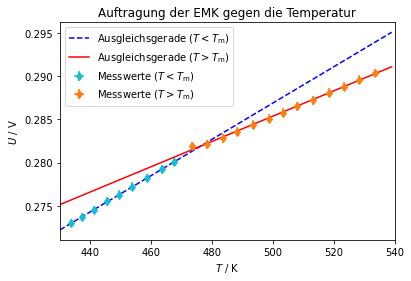

In [7]:
plt.errorbar(np.extract(T<= T_melt, T),np.extract(T<= T_melt, emk),yerr=delta_emk,xerr=delta_T,linestyle='None',marker='d',label='Messwerte ($T < T_\mathrm{m}$)',color='tab:cyan')
plt.errorbar(np.extract(T>= T_melt, T),np.extract(T>= T_melt, emk),yerr=delta_emk,xerr=delta_T,linestyle='None',marker='d',label='Messwerte ($T > T_\mathrm{m}$)',color='tab:orange')
x_range = np.arange(430,540)
plt.xlim(430,540)
plt.plot(x_range,linear(x_range,*popt_below),ls='--',label="Ausgleichsgerade ($T < T_\mathrm{m}$)",color='b')
plt.plot(x_range,linear(x_range,*popt_above),ls='-',label="Ausgleichsgerade ($T > T_\mathrm{m}$)",color='r')
plt.xlabel('$T$ / K')
plt.ylabel('$U$ / V')
plt.legend()
plt.title("Auftragung der EMK gegen die Temperatur")
plt.show()
plt.close()

Analog zu $G$ soll nun mittels SymPy jeweils für eine Steigung $\tilde{m}$ eine Funktion für $S(\tilde{m})$ und mit Hilfe von dieser eine Funktion für die Unsicherheit $\Delta S$ definiert werden. Analog zu $G$ müssen die Funktionsvariablen als „Symbole“ für SymPy definiert werden!

In [8]:
m,dm = symbols('m,dm')
S = z*F*m
dS = sqrt((diff(S,m)*dm)**2)
S = lambdify([z,m],S,'numpy')
dS = lambdify([z,m,dm],dS,'numpy')
S_above = np.array([S(2,popt_above[0]),dS(2,popt_above[0],perr_above[0])])
S_below = np.array([S(2,popt_below[0]),dS(2,popt_below[0],perr_below[0])])
print("Oberhalb")
print("m: " + np.array2string(m_above, separator=" ± "))
print("b: " + np.array2string(b_above, separator=" ± "))
print("S: " + str(S_above)+ " J/(mol×K)"+ "\n")
print("Unterhalb")
print("m: " + np.array2string(m_below, separator=" ± "))
print("b: " + np.array2string(b_below, separator=" ± "))
print("S: " + str(S_below) +  " J/(mol×K)"+ "\n")

Oberhalb
m: [1.465e-04 ± 2.381e-06]
b: [0.212 ± 0.001]
S: [28.267  0.459] J/(mol×K)

Unterhalb
m: [2.101e-04 ± 1.311e-06]
b: [0.182 ± 0.001]
S: [40.55   0.253] J/(mol×K)



## Dritter Auswertungsschritt


Nun ist es eure Aufgabe, die Enthalpie zu ermitteln. Analog zu $G$ und $S$ sollte dies mittels SymPy geschehen. Welche wichtige Gleichung aus der Thermodynamik verknüpft $H$, $G$ und $S$?


In [9]:
#Um die Funktionen/Werte nicht zu überschreiben, werden Kleinbuchstaben genutzt
g,dg,s,ds,t,dt = symbols('g dg s ds t dt')
h = g + t*s
dh = sqrt((diff(h,g)*dg)**2 + (diff(h,t)*dt)**2 + (diff(h,s)*ds)**2)
h = lambdify([g,t,s],h,'numpy')
dh = lambdify([g,dg,t,dt,s,ds],dh,'numpy')

#Array über alle möglichen Temperaturen
H_above = np.array([h(G(2,np.extract(T>= T_melt, emk)),np.extract(T>= T_melt, T),S_above[0]),dh(G(2,np.extract(T>= T_melt, emk)),dG(2,np.extract(T>= T_melt, emk),delta_emk),np.extract(T>= T_melt, T),delta_T,S_above[0],S_above[1])])
H_below = np.array([h(G(2,np.extract(T<= T_melt, emk)),np.extract(T<= T_melt, T),S_below[0]),dh(G(2,np.extract(T<= T_melt, emk)),dG(2,np.extract(T<= T_melt, emk),delta_emk),np.extract(T<= T_melt, T),delta_T,S_below[0],S_below[1])])

#Fehlergewichteter Mittelwert
H_above_avg = np.array([np.average(H_above[0],weights=H_above[1]),np.sqrt(np.cov(H_above[0],aweights=H_above[1]))])/1000
H_below_avg = np.array([np.average(H_below[0],weights=H_below[1]),np.sqrt(np.cov(H_below[0],aweights=H_below[1]))])/1000
#Fehlergewichtete Kovarianz ist KEIN Indikator
print(np.array2string(H_above_avg, separator=" ± ") + " kJ/mol")
print(np.array2string(H_below_avg, separator=" ± ") + " kJ/mol")

#

[-4.094e+01 ±  2.908e-02] kJ/mol
[-3.509e+01 ±  7.817e-03] kJ/mol


Als nächster Schritt soll aus dem Ordinatenschnittpunkt der zuvor bestimmten Ausgleichsgeraden die Enthalpie bestimmt werden. Müssen wir eine neue Funktion definieren?

... Folglich müssen wir keine neue Funktion schreiben, sondern können die für $G$ wiederverwerten.

In [10]:
H_0 = G(2,m_below[0])
dH_0 = dG(2,m_below[0],m_below[1])
print(np.array([H_0,dH_0]))

[-40.55    0.253]


## Vierter Auswertungsschritt
Die Reaktionsenthalpie soll jedoch auch durch eine weitere Auftragung, einer van’t Hoff-Auftragung, ermittelt werden. Entsprechend ist der natürliche Logarithmus der Gleichgewichtskonstanten $K_p$ gegen die inverse Temperatur $T^{-1}$ aufzutragen. 

Wie können wir $K_p$ oder besser $\ln(K_p)$ aus den zuvor bestimmten thermodynamischen Größen erhalten? Da die Auftragung Fehlerbalken enthalten sollte, ist auch die Unsicherheit von $\ln(K_p)$ zu bestimmen! Entsprechend sollte erneut SymPy genutzt werden.

In [38]:
logKp = -g/(R*t)
dlogKp = sqrt((diff(logKp,g)*dg)**2 + (diff(logKp,t)*dt)**2)
logKp = lambdify([g,t],logKp,'numpy')
dlogKp = lambdify([g,dg,t,dt],dlogKp,'numpy')
log_K_p = logKp(G(2,emk),T)
dlog_K_p = dlogKp(G(2,emk),dG(2,emk,delta_emk),T,delta_T)

Oberhalb
m: [4927.802 ±   28.944]
b: [3.392 ± 0.058]
H: [-40.972 ±  -0.241] kJ/mol
Unterhalb
m: [4220.635 ±   13.959]
b: [4.876 ± 0.031]
H: [-40.972 ±  -0.241] kJ/mol


Nachdem wir nun $\ln(K_p)$ bestimmt haben, extrahieren wir erneut jeweils die Wertepaare die ober- bzw. unterhalb des Phasenübergangs liegen und bestimmen analog zu oben je eine Ausgleichsgerade ober- und unterhalb des Schmelzpunkts.

In [ ]:
below = np.array([np.extract(T<= T_melt, 1/T),np.extract(T<= T_melt, log_K_p)])
above = np.array([np.extract(T>= T_melt, 1/T),np.extract(T>= T_melt, log_K_p)])
popt_below,pcov_below = curve_fit(linear,below[0],below[1])
perr_below = np.sqrt(np.diag(pcov_below))
popt_above,pcov_above = curve_fit(linear,above[0],above[1])
perr_above = np.sqrt(np.diag(pcov_above))

m_above_vH = np.array([popt_above[0],perr_above[0]])
m_below_vH = np.array([popt_below[0],perr_below[0]])
b_above_vH = np.array([popt_above[1],perr_above[1]])
b_below_vH = np.array([popt_below[1],perr_below[1]])

print("Oberhalb")
print("m: " + np.array2string(m_above_vH, separator=" ± "))
print("b: " + np.array2string(b_above_vH, separator=" ± "))
print("H: " + np.array2string(-m_above_vH*R/1000, separator=" ± ") + " kJ/mol")
print("Unterhalb")
print("m: " + np.array2string(m_below_vH, separator=" ± "))
print("b: " + np.array2string(b_below_vH, separator=" ± "))
print("H: " + np.array2string(-m_above_vH*R/1000, separator=" ± ") + " kJ/mol")

H_vH_above = np.array([-popt_above[0],-perr_above[0]])*R
H_vH_below = np.array([-popt_below[0],-perr_below[0]])*R

Abschließend sollen die Ergebnisse der linearen Regression (die Ausgleichsgeraden) zusammen mit den Messwerten aufgetragen werden. Wie üblich: Vergesst nicht die Legende, Titel, Achsenbeschriftung,…

In [39]:
plt.errorbar(1/T,log_K_p,yerr=dlog_K_p,marker='o',ms=3,ls='None',label='Messwerte') #ERRIRBAR
x_range = np.linspace(1.85e-3,2.33e-3,1000)
plt.xlim(1.85e-3,2.32e-3)
plt.plot(x_range,linear(x_range,*popt_below),ls='--',label="Ausgleichsgerade (unterhalb)")
plt.plot(x_range,linear(x_range,*popt_above),ls='-',label="Ausgleichsgerade (oberhalb)")
plt.xlabel("$T^{-1}$ / K$^{-1}$ ")
plt.ylabel("$\ln(K_p)$")
plt.title("van’t-Hoff-Auftragung")
plt.legend()
plt.show()
plt.close()

## Fünfter Auswertungsschritt
Nachfolgend ist es eure Aufgabe, die Umwandlungsenthalpie $\Delta_\mathrm{U} H$ zu ermitteln (wozu haben wir zwei Ausgleichsgeraden bestimmt?). Besprecht mit dem Assistenten, welche Enthalpien aus welcher Methode genutzt werden sollen.

In [12]:
#Hier wird H aus AVG von Gibbs-Helmholtz genutzt
H_GH_U = H_above_avg[0]-H_below_avg[0]

#Hier wird H aus van’t Hoff bestimmt
H_vH_U = H_vH_above[0] - H_vH_below[0]
dH_vH_U = np.sqrt((H_vH_above[1])**2 + (H_vH_above[1])**2  )
print(np.array([H_vH_U, dH_vH_U]))

[-5879.71    340.334]


Außerdem sind wir an der Umwandlungsentropie $\Delta_\mathrm{U} S$ interessiert. Wie wird diese erhalten?

In [13]:
S_U = S_above[0] - S_below[0]
dS_U = np.sqrt(S_above[1]**2 + S_below[1]**2)
print(np.array([S_U,dS_U]))

[-12.283   0.524]


## Sechster Auswertungsschritt
Abschließend ist die Schmelztemperatur $T_\mathrm{m}$ von Selen sowohl rechnerisch als auch graphisch zu bestimmen. Zunächst sollt ihr rechnerisch den Schmelzpunkt anhand des zweiten Hauptsatzes der Thermodynamik bestimmen. Welche Formel ist zu nutzen? Definiert euch diese mittels SymPy und berechnet das Ergebnis!

In [14]:
#Rechnerisch
Hu,dHu,Su,dSu = symbols('Hu dHu Su dSu')
Tm_r = Hu/Su
dTm_r = sqrt((diff(Tm_r,Hu)*dHu)**2 + (diff(Tm_r,Su)*dSu)**2)

Tm_r = lambdify([Hu,Su],Tm_r,'numpy')
dTm_r = lambdify([Hu,dHu,Su,dSu],dTm_r,'numpy')

T_m_rechn = np.array([Tm_r(H_vH_U,S_U),
                      dTm_r(H_vH_U,dH_vH_U,S_U,dS_U)
                     ])
print(T_m_rechn)

[478.682  34.43 ]
EMK
[476.141  29.224]
van’t Hoff
[476.299  30.156]


Die grafische Methode nutzt die verschiedenen Ausgleichsgeraden. Es sollte _nicht_ der Befehl <code>solve</code> von SymPy genutzt werden, da dieser uns nicht die Unsicherheit des Ergebnisses angibt. Einsetzen der Ober- und Untergrenzen würde uns die Größtfehler ergeben, an denen wir jedoch nicht interessiert sind.

In [40]:
#Graphisch
#a*x + b = w*x + q
#(a-w)*x = q-b
# x = (q-b)/(a-w)

q,dq,b,db,a,da,w,dw = symbols('q,dq,b,db,a,da,w,dw')
Tm_g = (q-b)/(a-w)
dTm_g = sqrt((diff(Tm_g,q)*dq)**2 + (diff(Tm_g,a)*da)**2 + (diff(Tm_g,b)*db)**2 + (diff(Tm_g,w)*dw)**2)
#pprint(dTm_g)
Tm_g = lambdify([q,b,a,w],Tm_g,'numpy')
dTm_g = lambdify([q,dq,b,db,a,da,w,dw],dTm_g,'numpy')

#Graphisch EMK
Tm_g_emk = np.array([Tm_g(b_above[0], b_below[0], m_below[0], m_above[0]), 
                    dTm_g(b_above[0],b_above[1], b_below[0],b_below[1], m_below[0],m_below[1], m_above[0],m_above[1])
                   ])
#Graphisch van’t Hoff
Tm_g_vH = np.array([Tm_g(b_above_vH[0], b_below_vH[0], m_below_vH[0], m_above_vH[0]), 
                    dTm_g(b_above_vH[0],b_above_vH[1], b_below_vH[0],b_below_vH[1], m_below_vH[0],m_below_vH[1], m_above_vH[0],m_above_vH[1])
                   ])
print("EMK")
print(Tm_g_emk)
print("van’t Hoff")
print(np.array([1/Tm_g_vH[0], Tm_g_vH[1]/Tm_g_vH[0]**2]))

EMK
[476.141  29.224]
van’t Hoff
[476.299  30.156]


---
Arved Dorst, Göttingen, __2021__.